In [17]:
import re
import pandas as pd
import numpy as np
import math
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

from collections import defaultdict
data = pd.read_csv('IMDB Dataset.csv')

In [18]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## Data Preprocessing

In [19]:
def pre_process(text):
    
    result = re.sub('<[^>]*>', '', text) #remove_tags
    result = re.sub('https://.*','',result) #remove URLs
    result = re.sub('[^a-zA-Z]', ' ',result) #remove non-alphanumeric characters
    result = re.sub('  ',' ', result)
    result = result.lower()
#     print(result)
    return result

In [20]:
data['review'] = data['review'].apply(lambda x: pre_process(x))

In [21]:
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is a...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i m going to have to disagree with the previou...,negative


## Removing Stopwords

In [22]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# print ("stop_words", stop_words)
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [23]:
data

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary schools n...,negative
49998,going disagree previous comment side maltin on...,negative


In [24]:
# nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
data['review'] = data.review.apply(lemmatize_text)

In [25]:
data

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


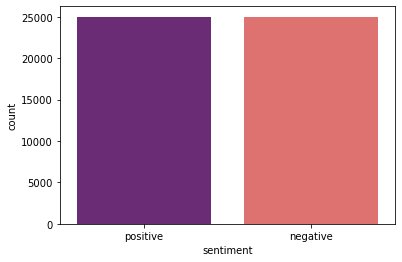

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
# import scikitplot as skplt

sns.countplot(x='sentiment', data= data, palette="magma")
plt.show()

In [27]:
def change_number(text):
    
    if text == 'positive':
        text=1
    elif text=='negative':
        text=0
    return text

In [28]:
data['sentiment']=data['sentiment'].apply(lambda x: change_number(x))

In [29]:
data

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1
...,...,...
49995,thought movie right good job creative original...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary school nu...,0
49998,going disagree previous comment side maltin on...,0


In [30]:
from sklearn.preprocessing import LabelEncoder 

vectorizer = TfidfVectorizer()
y=data['sentiment']
X= vectorizer.fit_transform(data['review'])

In [31]:
print(X.shape)
print(y.shape)

(50000, 91705)
(50000,)


In [32]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn import naive_bayes 
clf= naive_bayes.MultinomialNB()
clf.fit(train_sentences, train_labels)

MultinomialNB()

In [34]:
preds = clf.predict(test_sentences)
accuray = accuracy_score(preds, test_labels)

print("Accuracy:", accuray)

Accuracy: 0.8668


In [35]:
print(classification_report(preds, test_labels))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      5101
           1       0.85      0.88      0.87      4899

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

